<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/Nasa_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install xgboost
!pip install scikit-optimize==0.5.2
!pip install GPy
!pip install GPyOpt
!pip install xgboost

  Using cached scikit_optimize-0.5.2-py2.py3-none-any.whl.metadata (7.1 kB)
Using cached scikit_optimize-0.5.2-py2.py3-none-any.whl (74 kB)
  Attempting uninstall: scikit-optimize
    Found existing installation: scikit-optimize 0.10.2
    Uninstalling scikit-optimize-0.10.2:
      Successfully uninstalled scikit-optimize-0.10.2


In [2]:
!pip install scikit-optimize==0.9.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-optimize
    Found existing installation: scikit-optimize 0.5.2
    Uninstalling scikit-optimize-0.5.2:
      Successfully uninstalled scikit-optimize-0.5.2


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutimehta/nasa-asteroids-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shrutimehta/nasa-asteroids-classification/versions/1


In [12]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/helper_functions.py

--2025-02-01 06:28:52--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10247 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-02-01 06:28:52 (57.3 MB/s) - ‘helper_functions.py.1’ saved [10247/10247]



In [13]:
from helper_functions import *

In [14]:
unzip_data("/content/archive (8).zip")

In [15]:
df = pd.read_csv("/content/nasa.csv")
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [16]:
df.shape

(4687, 40)

In [17]:
df.dtypes

,0
Neo Reference ID,int64
Name,int64
Absolute Magnitude,float64
Est Dia in KM(min),float64
Est Dia in KM(max),float64
Est Dia in M(min),float64
Est Dia in M(max),float64
Est Dia in Miles(min),float64
Est Dia in Miles(max),float64
Est Dia in Feet(min),float64


<Axes: xlabel='Hazardous'>

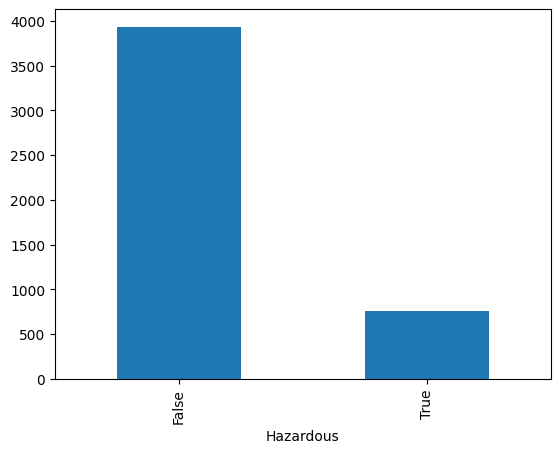

In [18]:
df['Hazardous'].value_counts().plot(kind='bar')

In [19]:
df["Hazardous"] = df["Hazardous"].astype(int)

In [20]:
df['Hazardous'].value_counts()

,count
Hazardous,
0,3932
1,755


In [21]:
df.isna().sum()

,0
Neo Reference ID,0
Name,0
Absolute Magnitude,0
Est Dia in KM(min),0
Est Dia in KM(max),0
Est Dia in M(min),0
Est Dia in M(max),0
Est Dia in Miles(min),0
Est Dia in Miles(max),0
Est Dia in Feet(min),0


In [22]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [23]:
for i in df.columns:
  df.rename(columns={i:i.replace(" ","_")},inplace=True)

In [24]:
df.columns

Index(['Neo_Reference_ID', 'Name', 'Absolute_Magnitude', 'Est_Dia_in_KM(min)',
       'Est_Dia_in_KM(max)', 'Est_Dia_in_M(min)', 'Est_Dia_in_M(max)',
       'Est_Dia_in_Miles(min)', 'Est_Dia_in_Miles(max)',
       'Est_Dia_in_Feet(min)', 'Est_Dia_in_Feet(max)', 'Close_Approach_Date',
       'Epoch_Date_Close_Approach', 'Relative_Velocity_km_per_sec',
       'Relative_Velocity_km_per_hr', 'Miles_per_hour',
       'Miss_Dist.(Astronomical)', 'Miss_Dist.(lunar)',
       'Miss_Dist.(kilometers)', 'Miss_Dist.(miles)', 'Orbiting_Body',
       'Orbit_ID', 'Orbit_Determination_Date', 'Orbit_Uncertainity',
       'Minimum_Orbit_Intersection', 'Jupiter_Tisserand_Invariant',
       'Epoch_Osculation', 'Eccentricity', 'Semi_Major_Axis', 'Inclination',
       'Asc_Node_Longitude', 'Orbital_Period', 'Perihelion_Distance',
       'Perihelion_Arg', 'Aphelion_Dist', 'Perihelion_Time', 'Mean_Anomaly',
       'Mean_Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [25]:
print(f"has {df.duplicated().sum()} duplicated rows")

has 0 duplicated rows


In [26]:
print(f"There are  {len(df.columns)} columns")

There are  40 columns


In [27]:
df['Equinox'].value_counts()


,count
Equinox,
J2000,4687


In [28]:
df['Orbiting_Body'].value_counts()

,count
Orbiting_Body,
Earth,4687


In [29]:
df['Orbit_Determination_Date'].unique()

array(['2017-04-06 08:36:37', '2017-04-06 08:32:49',
       '2017-04-06 09:20:19', ..., '2017-04-06 08:23:43',
       '2017-04-06 08:23:42', '2017-04-29 06:18:33'], dtype=object)

In [30]:
df["Close_Approach_Date"].nunique()

777

In [31]:
df["Epoch_Date_Close_Approach"].unique()

array([ 788947200000,  789552000000,  790156800000,  790761600000,
        792230400000,  792835200000,  793440000000,  794649600000,
        795254400000,  795859200000,  797324400000,  797929200000,
        798534000000,  799916400000,  800521200000,  801126000000,
        802594800000,  803199600000,  803804400000,  805186800000,
        805791600000,  806396400000,  807865200000,  808470000000,
        809074800000,  810543600000,  811148400000,  811753200000,
        813135600000,  813740400000,  814345200000,  815817600000,
        816422400000,  817027200000,  818409600000,  819014400000,
        819619200000,  821088000000,  821692800000,  822297600000,
        823766400000,  824371200000,  824976000000,  826272000000,
        827481600000,  828946800000,  829551600000,  830156400000,
        831538800000,  832143600000,  832748400000,  834217200000,
        834822000000,  835426800000,  836809200000,  837414000000,
        838018800000,  839487600000,  840092400000,  840697200

In [32]:
df.drop(["Neo_Reference_ID","Name", "Equinox","Orbiting_Body",
         "Orbit_ID","Orbit_Determination_Date", "Close_Approach_Date",
         "Epoch_Date_Close_Approach"],axis=1,inplace=True)

In [33]:
df

,Absolute_Magnitude,Est_Dia_in_KM(min),Est_Dia_in_KM(max),Est_Dia_in_M(min),Est_Dia_in_M(max),Est_Dia_in_Miles(min),Est_Dia_in_Miles(max),Est_Dia_in_Feet(min),Est_Dia_in_Feet(max),Relative_Velocity_km_per_sec,...,Inclination,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Perihelion_Arg,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Hazardous
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,22.154265,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,3.225150,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,7.191642,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,11.352090,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute_Magnitude            4687 non-null   float64
 1   Est_Dia_in_KM(min)            4687 non-null   float64
 2   Est_Dia_in_KM(max)            4687 non-null   float64
 3   Est_Dia_in_M(min)             4687 non-null   float64
 4   Est_Dia_in_M(max)             4687 non-null   float64
 5   Est_Dia_in_Miles(min)         4687 non-null   float64
 6   Est_Dia_in_Miles(max)         4687 non-null   float64
 7   Est_Dia_in_Feet(min)          4687 non-null   float64
 8   Est_Dia_in_Feet(max)          4687 non-null   float64
 9   Relative_Velocity_km_per_sec  4687 non-null   float64
 10  Relative_Velocity_km_per_hr   4687 non-null   float64
 11  Miles_per_hour                4687 non-null   float64
 12  Miss_Dist.(Astronomical)      4687 non-null   float64
 13  Mis

In [35]:
df.describe()

,Absolute_Magnitude,Est_Dia_in_KM(min),Est_Dia_in_KM(max),Est_Dia_in_M(min),Est_Dia_in_M(max),Est_Dia_in_Miles(min),Est_Dia_in_Miles(max),Est_Dia_in_Feet(min),Est_Dia_in_Feet(max),Relative_Velocity_km_per_sec,...,Inclination,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Perihelion_Arg,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Hazardous
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,13.970811,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,7.293223,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,0.335504,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,8.432865,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,12.917889,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,18.077649,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,44.633747,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


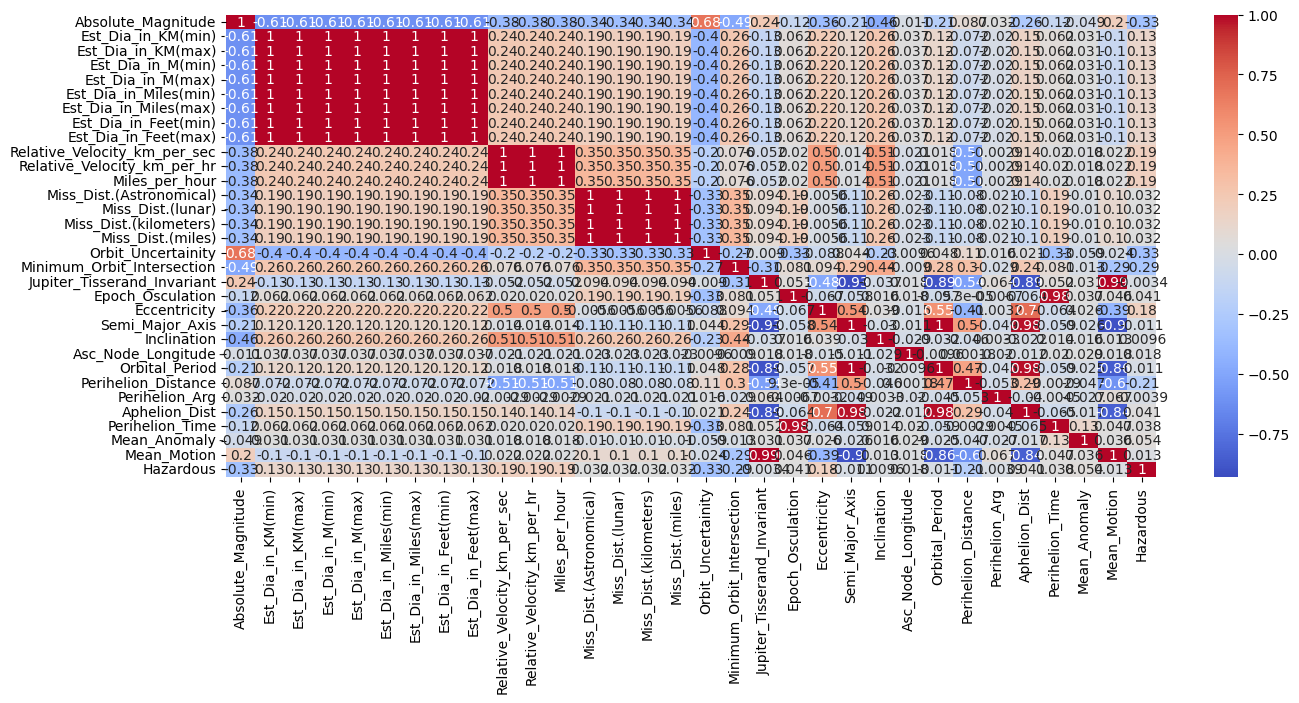

In [36]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [37]:
df.columns

Index(['Absolute_Magnitude', 'Est_Dia_in_KM(min)', 'Est_Dia_in_KM(max)',
       'Est_Dia_in_M(min)', 'Est_Dia_in_M(max)', 'Est_Dia_in_Miles(min)',
       'Est_Dia_in_Miles(max)', 'Est_Dia_in_Feet(min)', 'Est_Dia_in_Feet(max)',
       'Relative_Velocity_km_per_sec', 'Relative_Velocity_km_per_hr',
       'Miles_per_hour', 'Miss_Dist.(Astronomical)', 'Miss_Dist.(lunar)',
       'Miss_Dist.(kilometers)', 'Miss_Dist.(miles)', 'Orbit_Uncertainity',
       'Minimum_Orbit_Intersection', 'Jupiter_Tisserand_Invariant',
       'Epoch_Osculation', 'Eccentricity', 'Semi_Major_Axis', 'Inclination',
       'Asc_Node_Longitude', 'Orbital_Period', 'Perihelion_Distance',
       'Perihelion_Arg', 'Aphelion_Dist', 'Perihelion_Time', 'Mean_Anomaly',
       'Mean_Motion', 'Hazardous'],
      dtype='object')

In [38]:
df = df.drop(columns=['Est_Dia_in_KM(min)','Est_Dia_in_M(min)',
                      'Est_Dia_in_M(max)','Est_Dia_in_M(min)',
                      'Est_Dia_in_Miles(min)','Est_Dia_in_Miles(max)',
                      'Est_Dia_in_Feet(min)', 'Est_Dia_in_Feet(max)',
                      'Miles_per_hour', 'Miss_Dist.(Astronomical)',
                      'Miss_Dist.(lunar)','Relative_Velocity_km_per_hr'], axis=1 )

In [39]:
df

,Absolute_Magnitude,Est_Dia_in_KM(max),Relative_Velocity_km_per_sec,Miss_Dist.(kilometers),Miss_Dist.(miles),Orbit_Uncertainity,Minimum_Orbit_Intersection,Jupiter_Tisserand_Invariant,Epoch_Osculation,Eccentricity,...,Inclination,Asc_Node_Longitude,Orbital_Period,Perihelion_Distance,Perihelion_Arg,Aphelion_Dist,Perihelion_Time,Mean_Anomaly,Mean_Motion,Hazardous
0,21.600,0.284472,6.115834,6.275369e+07,3.899334e+07,5,0.025282,4.634,2458000.5,0.425549,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.326618,18.113985,5.729815e+07,3.560342e+07,3,0.186935,5.457,2458000.5,0.351674,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.517654,7.590711,7.622912e+06,4.736658e+06,0,0.043058,4.557,2458000.5,0.348248,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.019681,11.173874,4.268362e+07,2.652237e+07,6,0.005512,5.093,2458000.5,0.216578,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.284472,9.840831,6.101082e+07,3.791037e+07,1,0.034798,5.154,2458000.5,0.210448,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.098637,22.154265,6.187511e+06,3.844741e+06,8,0.019777,5.156,2457637.5,0.361512,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.013616,3.225150,9.677324e+05,6.013211e+05,6,0.006451,5.742,2458000.5,0.073200,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.171412,7.191642,9.126775e+06,5.671115e+06,6,0.059972,4.410,2458000.5,0.368055,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.259442,11.352090,3.900908e+07,2.423912e+07,5,0.177510,4.477,2458000.5,0.202565,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


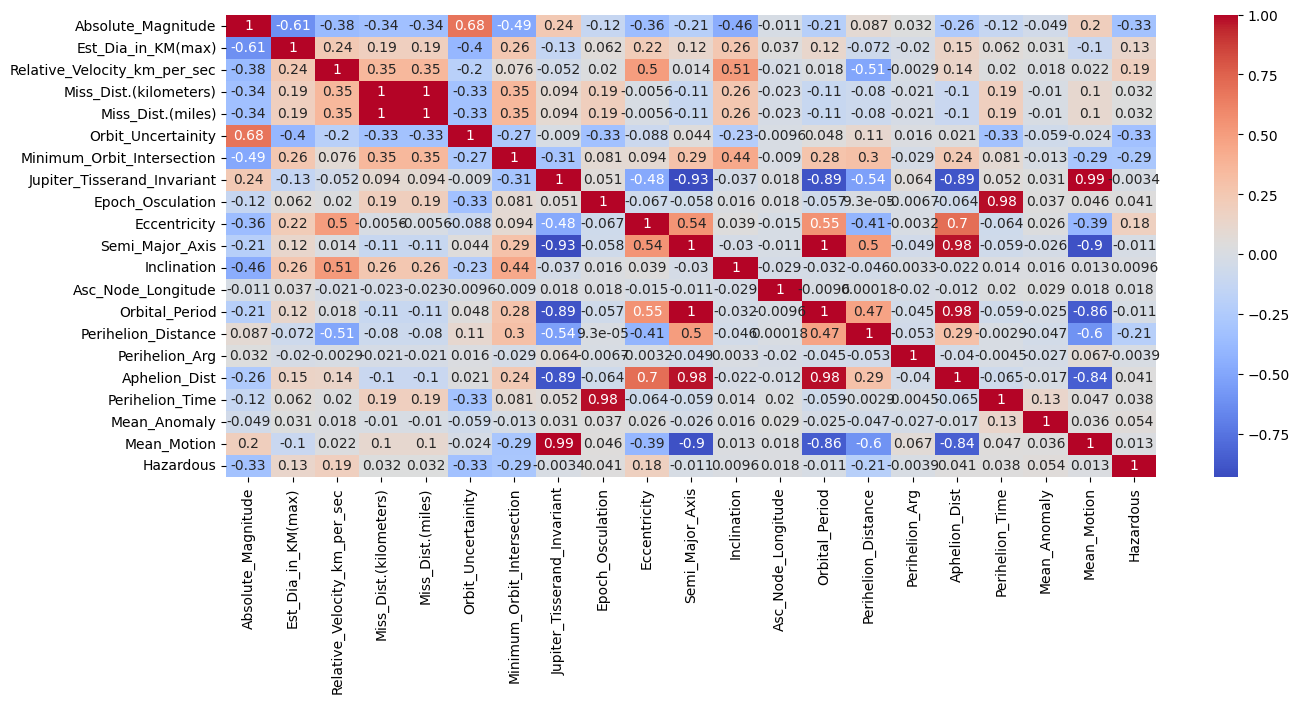

In [40]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [41]:
df = df.drop('Miss_Dist.(miles)', axis = 1)

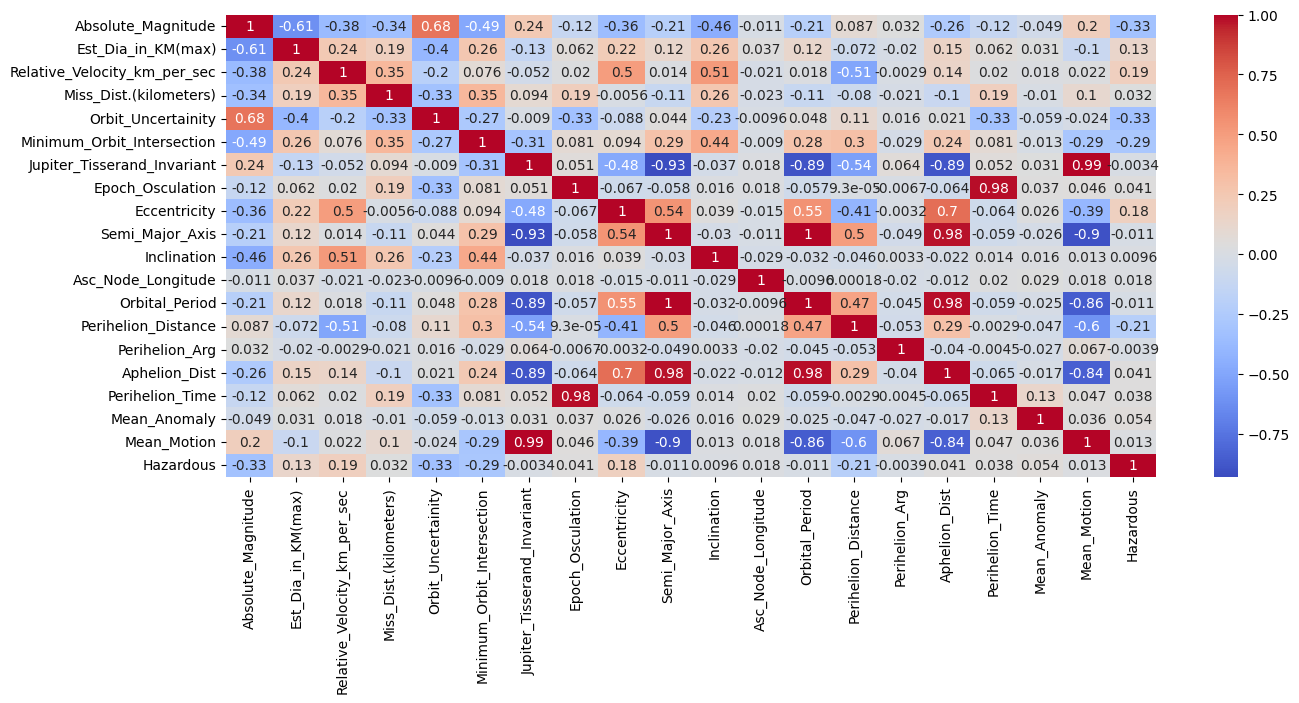

In [42]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#Model building

In [43]:
X = df.drop('Hazardous', axis = 1)
y = df['Hazardous']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#XGBClassier

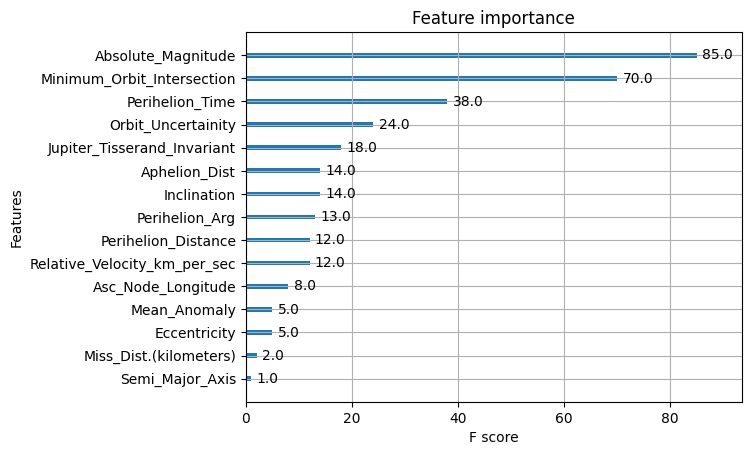

In [106]:
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
plot_importance(xgb_model)
plt.show()

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = xgb_model.predict(X_test)

In [108]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9946695095948828


In [109]:
xgb_best_score = accuracy_score(y_test, y_pred)
xgb_best_score

0.9946695095948828

In [48]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Confusion Matrix:
 [[788   3]
 [  2 145]]


In [49]:
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.98      0.99      0.98       147

    accuracy                           0.99       938
   macro avg       0.99      0.99      0.99       938
weighted avg       0.99      0.99      0.99       938



#Using BayesianOptimization

In [67]:
!pip install optuna

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [111]:
import optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    xbg_model_2 = XGBClassifier(use_label_encoder=False, eval_metric="logloss", **params)
    score = cross_val_score(xbg_model_2, X_train, y_train, cv=3, scoring='accuracy').mean()

    return score


In [112]:
# Run optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2025-02-01 07:23:36,441] A new study created in memory with name: no-name-76eabb71-cfc5-4d95-a234-7bfa3950bad3
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-01 07:23:37,304] Trial 0 finished with value: 0.9941316253002402 and parameters: {'n_estimators': 122, 'max_depth': 10, 'learning_rate': 0.010216207340915, 'subsample': 0.8672566692407712, 'colsample_bytree': 0.6963944730006955, 'gamma': 3

In [113]:
# Best parameters
print("Best Parameters:", study.best_params)

Best Parameters: {'n_estimators': 129, 'max_depth': 6, 'learning_rate': 0.045842798075811125, 'subsample': 0.7635695195571361, 'colsample_bytree': 0.5605219383097793, 'gamma': 4.345009478770664, 'reg_alpha': 5.0480934905550106, 'reg_lambda': 3.412575185330832, 'min_child_weight': 2}


In [114]:
print("Best Score:", study.best_value)

Best Score: 0.9965318388043768


In [115]:
bayesian_best_score = study.best_value
bayesian_best_score

0.9965318388043768

In [76]:
print("best_trial", study.best_trial)

best_trial FrozenTrial(number=6, state=1, values=[0.9967987189751802], datetime_start=datetime.datetime(2025, 2, 1, 6, 40, 53, 508399), datetime_complete=datetime.datetime(2025, 2, 1, 6, 40, 57, 402439), params={'n_estimators': 362, 'max_depth': 3, 'learning_rate': 0.03794881450686914, 'subsample': 0.624075604309621, 'colsample_bytree': 0.5794524896695928, 'gamma': 0.22339606118828403, 'reg_alpha': 0.26917583076453977, 'reg_lambda': 1.2626903151268531, 'min_child_weight': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=True, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'gamma': FloatDistribution(high=5.0, log=False, low=0.0, step=None), 'reg_alpha': F

In [77]:
study.best_trial.number

6

In [78]:
study.best_trial.values

[0.9967987189751802]

#Using RandomizedSearchCV

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5)
}

xgb_model_3 = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
rdm_search = RandomizedSearchCV(xgb_model_3, param_distributions=param_dist, n_iter=10, cv=5,
                                random_state=0, scoring='accuracy', n_jobs=1)
rdm_search.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:41:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:41:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:41:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:41:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:41:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                   param_distributions={'colsample_bytree': array([0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
                   random_state=0, scoring='accuracy')

In [135]:
y_pred = rdm_search.predict(X_test)

In [136]:
rdm_best_score = rdm_search.best_score_
rdm_best_score

0.9965322652425457

In [94]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9936034115138592


In [95]:
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

Confusion Matrix:
 [[792   1]
 [  5 140]]


In [96]:
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       793
           1       0.99      0.97      0.98       145

    accuracy                           0.99       938
   macro avg       0.99      0.98      0.99       938
weighted avg       0.99      0.99      0.99       938



#visualization  XGBoost vs Bayesian Optimization vs Randomized Search

In [119]:
data_score = pd.DataFrame({
    "Method": ["XGBoost", "Bayesian Optimization", "Randomized Search"],
    "Best Score": [xgb_best_score, bayesian_best_score, rdm_best_score]
})

In [120]:
data_score

,Method,Best Score
0,XGBoost,0.994670
1,Bayesian Optimization,0.996532
2,Randomized Search,0.996532


<ipython-input-131-a428eef5de15>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Method", y="Best Score", data=data_score, palette='viridis')


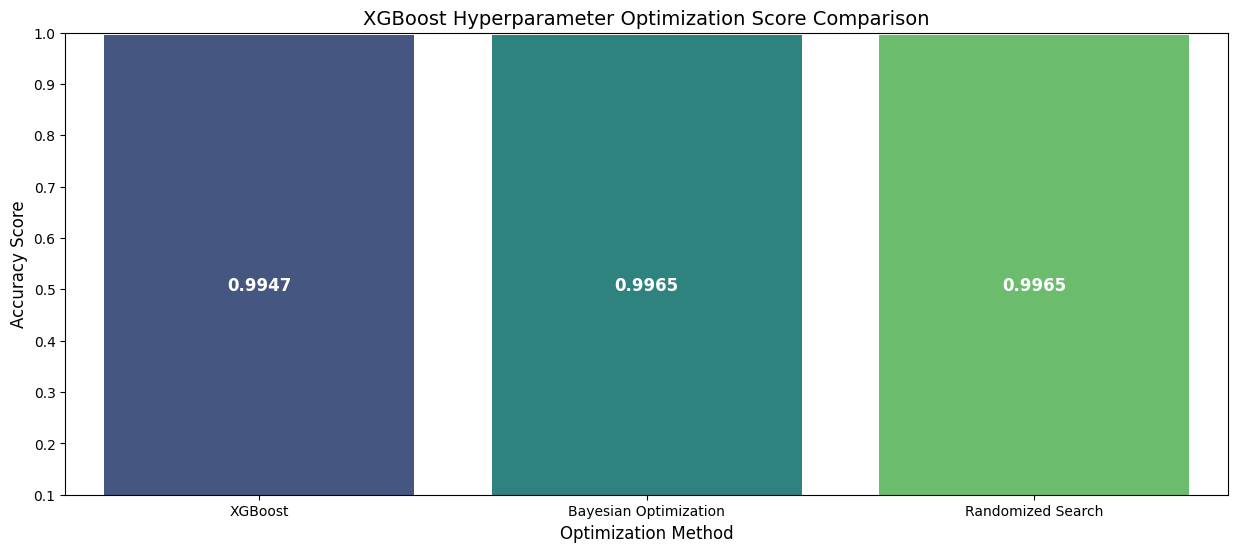

In [131]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x="Method", y="Best Score", data=data_score, palette='viridis')

for index, row in data_score.iterrows():
    ax.text(index, row["Best Score"] / 2, f"{row['Best Score']:.4f}",
            ha="center", fontsize=12, fontweight='bold', color="white")
plt.title("XGBoost Hyperparameter Optimization Score Comparison", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=12)
plt.xlabel("Optimization Method", fontsize=12)
plt.ylim(0.1, 1.0)
plt.show()